In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


In [2]:
datos = pd.read_csv("/home/nicolas/Github/Programacion/machileLearning/data_train/train.csv", index_col=0)
print(datos)

     surface_area  agricultural_land   forest_area  armed_forces_total  \
0        120540.0       2.632839e+06  5.417843e+06           1379000.0   
1        752610.0       2.403039e+07  4.957554e+07             16500.0   
2          1396.0       3.000000e+03  8.000000e+01                 NaN   
3       2758812.0       1.228845e+08  1.050943e+08           1518650.0   
4           340.0       1.100000e+04  1.699000e+04                 NaN   
..            ...                ...           ...                 ...   
457      243610.0       1.736999e+07  3.131596e+06            159150.0   
458     9831510.0       4.357576e+08  3.326943e+08           1433150.0   
459      176220.0       1.446148e+07  1.811858e+06             25450.0   
460      330972.0       1.160670e+07  1.549346e+07            522000.0   
461         350.0       4.000000e+03  1.782000e+04                 NaN   

     urban_pop_major_cities  urban_pop_minor_cities national_income  \
0                 55.747169             

In [3]:
datos.head(10)

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195
1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366
2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000
3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197
4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561
5,783560.0,3.910215e+07,1.161428e+07,612800.0,37.699524,34.134476,medium low,NaN,0.740964,NaN,less than 1 per person,45 per 100 people,1.166004e+08,very high access,[0%-25%),74.862439
6,28460395.0,8.391475e+08,1.081038e+09,5032780.0,32.853558,37.469387,medium high,2.773339,NaN,NaN,more than 1 per person,64 per 100 people,4.702241e+08,very high access,[0%-25%),76.569368
7,549091.0,2.892719e+07,1.669652e+07,325600.0,24.582761,54.237239,high,1.955685,NaN,NaN,less than 1 per person,81 per 100 people,4.093085e+08,very high access,[25%-50%),81.968293
8,357170.0,1.707661e+07,1.169559e+07,186450.0,18.091168,56.596832,high,2.008491,NaN,NaN,more than 1 per person,82 per 100 people,1.110775e+09,very high access,[25%-50%),80.892683
10,716.0,7.403399e+02,1.658159e+04,147600.0,51.288344,48.711656,unknown,NaN,0.377388,NaN,more than 1 per person,72 per 100 people,6.353061e+08,very high access,[0%-25%),81.995122


In [4]:
print(datos.shape)

(362, 16)


In [5]:
print(datos.dtypes)

surface_area                     float64
agricultural_land                float64
forest_area                      float64
armed_forces_total               float64
urban_pop_major_cities           float64
urban_pop_minor_cities           float64
national_income                   object
inflation_annual                 float64
inflation_monthly                float64
inflation_weekly                 float64
mobile_subscriptions              object
internet_users                    object
secure_internet_servers_total    float64
improved_sanitation               object
women_parliament_seats_rate       object
life_expectancy                  float64
dtype: object


In [6]:
print(datos.describe())

       surface_area  agricultural_land   forest_area  armed_forces_total  \
count  3.620000e+02       3.580000e+02  3.570000e+02        3.180000e+02   
mean   4.021884e+06       1.594881e+08  1.204151e+08        9.849864e+05   
std    1.234491e+07       4.964143e+08  3.796623e+08        2.994686e+06   
min    3.030000e+01       3.000000e+02  0.000000e+00        5.000000e+01   
25%    2.783000e+04       1.054198e+06  4.951445e+05        1.218000e+04   
50%    2.037745e+05       5.360256e+06  3.928535e+06        5.352500e+04   
75%    1.081610e+06       4.221935e+07  2.241297e+07        2.598000e+05   
max    1.343253e+08       5.067600e+09  4.132117e+09        2.720662e+07   

       urban_pop_major_cities  urban_pop_minor_cities  inflation_annual  \
count              360.000000              360.000000        146.000000   
mean                27.659456               29.175242          1.681539   
std                 20.512885               21.206494          0.980308   
min            

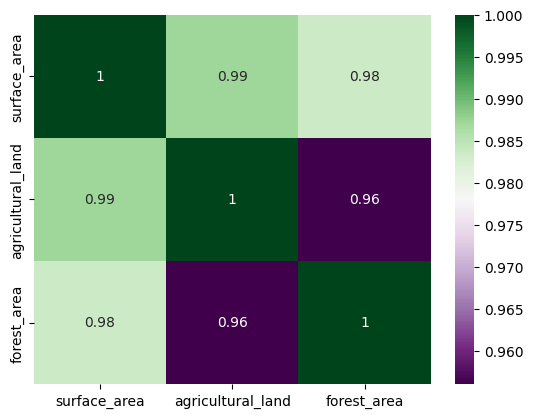

In [7]:
sns.heatmap(datos[['surface_area', 'agricultural_land','forest_area']].corr(),cmap='PRGn',annot=True);

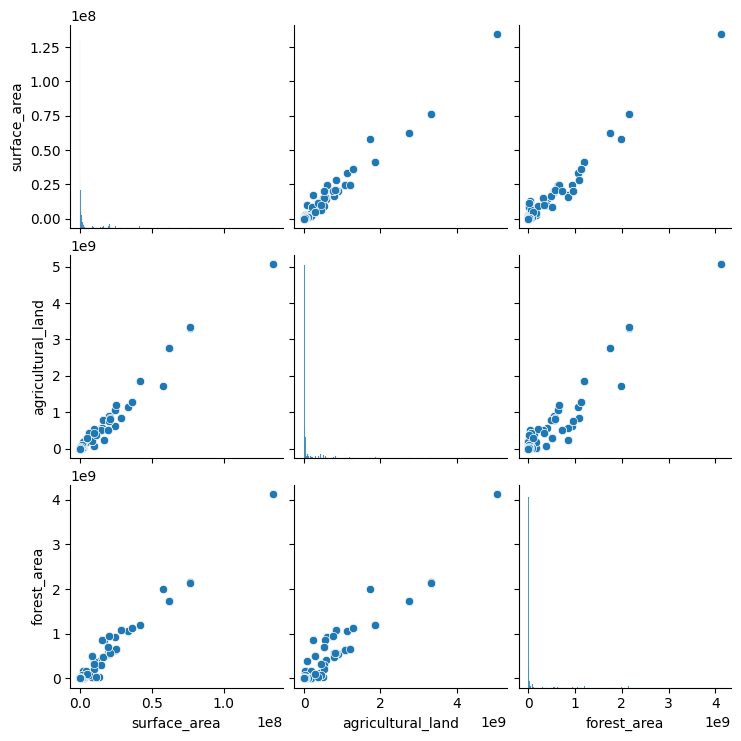

In [8]:
sns.pairplot(datos[['surface_area', 'agricultural_land','forest_area']]);

In [9]:
data_copy = datos.copy()
# multiplicamos por cien la primera columna
print(data_copy)
data_copy["surface_area"] = data_copy["surface_area"]*100
# create new variables
data_copy['agricultural_portion'] = data_copy['agricultural_land']/data_copy['surface_area']
data_copy['forest_portion'] = data_copy['forest_area']/data_copy['surface_area']
data_copy.drop(['agricultural_land','forest_area'], axis=1, inplace=True)
# print(data_copy)

data_copy.head(10)

     surface_area  agricultural_land   forest_area  armed_forces_total  \
0        120540.0       2.632839e+06  5.417843e+06           1379000.0   
1        752610.0       2.403039e+07  4.957554e+07             16500.0   
2          1396.0       3.000000e+03  8.000000e+01                 NaN   
3       2758812.0       1.228845e+08  1.050943e+08           1518650.0   
4           340.0       1.100000e+04  1.699000e+04                 NaN   
..            ...                ...           ...                 ...   
457      243610.0       1.736999e+07  3.131596e+06            159150.0   
458     9831510.0       4.357576e+08  3.326943e+08           1433150.0   
459      176220.0       1.446148e+07  1.811858e+06             25450.0   
460      330972.0       1.160670e+07  1.549346e+07            522000.0   
461         350.0       4.000000e+03  1.782000e+04                 NaN   

     urban_pop_major_cities  urban_pop_minor_cities national_income  \
0                 55.747169             

,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy,agricultural_portion,forest_portion
0,1.205400e+07,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195,0.218420,0.449464
1,7.526100e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366,0.319294,0.658715
2,1.396000e+05,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000,0.021490,0.000573
3,2.758812e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197,0.445426,0.380940
4,3.400000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561,0.323529,0.499706
5,7.835600e+07,612800.0,37.699524,34.134476,medium low,NaN,0.740964,NaN,less than 1 per person,45 per 100 people,1.166004e+08,very high access,[0%-25%),74.862439,0.499032,0.148224
6,2.846040e+09,5032780.0,32.853558,37.469387,medium high,2.773339,NaN,NaN,more than 1 per person,64 per 100 people,4.702241e+08,very high access,[0%-25%),76.569368,0.294847,0.379839
7,5.490910e+07,325600.0,24.582761,54.237239,high,1.955685,NaN,NaN,less than 1 per person,81 per 100 people,4.093085e+08,very high access,[25%-50%),81.968293,0.526820,0.304076
8,3.571700e+07,186450.0,18.091168,56.596832,high,2.008491,NaN,NaN,more than 1 per person,82 per 100 people,1.110775e+09,very high access,[25%-50%),80.892683,0.478109,0.327452
10,7.160000e+04,147600.0,51.288344,48.711656,unknown,NaN,0.377388,NaN,more than 1 per person,72 per 100 people,6.353061e+08,very high access,[0%-25%),81.995122,0.010340,0.231586


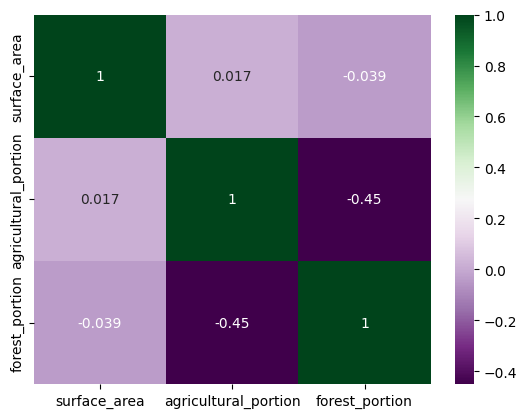

In [10]:
sns.heatmap(data_copy[['surface_area', 'agricultural_portion','forest_portion']].corr(),cmap='PRGn',annot=True);

In [11]:
numero_de_datos_nulos = data_copy.isnull().sum()
print(numero_de_datos_nulos)

surface_area                       0
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
agricultural_portion               4
forest_portion                     5
dtype: int64


In [12]:
for i in data_copy.index:
    if np.isnan(data_copy.loc[i, 'inflation_annual']):
        if np.isnan(data_copy.loc[i, 'inflation_monthly']):
            data_copy.loc[i, 'inflation_annual'] = 52 * data_copy.loc[i, 'inflation_weekly']
        else:
            data_copy.loc[i, 'inflation_annual'] = 12 * data_copy.loc[i, 'inflation_monthly']

# Remove columns 'inflation_monthly' & 'inflation_weekly'
data_copy.drop(['inflation_monthly', 'inflation_weekly'], axis=1, inplace=True)

In [13]:
data_copy.isnull().sum()

surface_area                      0
armed_forces_total               44
urban_pop_major_cities            2
urban_pop_minor_cities            2
national_income                   0
inflation_annual                 40
mobile_subscriptions              0
internet_users                    0
secure_internet_servers_total    10
improved_sanitation               0
women_parliament_seats_rate       0
life_expectancy                   0
agricultural_portion              4
forest_portion                    5
dtype: int64

In [14]:
# Convert categorical and ordinal fearures into numeric features
# Decide which categorical variables you want to use in model
for col_name in data_copy.columns:
    if data_copy[col_name].dtypes == 'object':
        unique_cat = len(data_copy[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'national_income' has 7 unique categories
Feature 'mobile_subscriptions' has 5 unique categories
Feature 'internet_users' has 198 unique categories
Feature 'improved_sanitation' has 6 unique categories
Feature 'women_parliament_seats_rate' has 4 unique categories


In [15]:
# Explore values in 'internet_users' column
data_copy['internet_users']

0        0 per 1000 people
1      154 per 1000 people
2        90 per 100 people
3        76 per 100 people
4      350 per 1000 people
              ...         
457      90 per 100 people
458      84 per 100 people
459      58 per 100 people
460      44 per 100 people
461      45 per 100 people
Name: internet_users, Length: 362, dtype: object

In [16]:
# Convert 'internet_users' column to associated percentages
variable_split = data_copy['internet_users'].str.split()
data_copy['percent_internet_users'] = (pd.to_numeric(variable_split.str.get(0), errors='coerce') / 
                          pd.to_numeric(variable_split.str.get(2), errors='coerce'))
# Remove 'internet_users' column
data_copy.drop('internet_users', axis=1, inplace=True)

In [17]:
data_copy.head()

,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,mobile_subscriptions,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy,agricultural_portion,forest_portion,percent_internet_users
0,12054000.0,1379000.0,55.747169,4.688831,unknown,NaN,less than 1 per person,NaN,high access,[0%-25%),69.494195,0.218420,0.449464,0.000
1,75261000.0,16500.0,16.890687,23.136313,very low,6.977676,less than 1 per person,2.623624e+06,low access,[0%-25%),59.237366,0.319294,0.658715,0.154
2,139600.0,NaN,18.390090,23.139910,unknown,NaN,more than 1 per person,1.656589e+09,no info,unknown,81.300000,0.021490,0.000573,0.900
3,275881200.0,1518650.0,50.966885,24.522427,high,1.374906,more than 1 per person,6.625072e+08,very high access,[25%-50%),81.373197,0.445426,0.380940,0.760
4,34000.0,NaN,5.311885,30.271115,unknown,-0.044229,more than 1 per person,2.832808e+07,very high access,[25%-50%),73.193561,0.323529,0.499706,0.350


In [18]:
data_copy.head(10)

,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,mobile_subscriptions,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy,agricultural_portion,forest_portion,percent_internet_users
0,1.205400e+07,1379000.0,55.747169,4.688831,unknown,NaN,less than 1 per person,NaN,high access,[0%-25%),69.494195,0.218420,0.449464,0.000
1,7.526100e+07,16500.0,16.890687,23.136313,very low,6.977676,less than 1 per person,2.623624e+06,low access,[0%-25%),59.237366,0.319294,0.658715,0.154
2,1.396000e+05,NaN,18.390090,23.139910,unknown,NaN,more than 1 per person,1.656589e+09,no info,unknown,81.300000,0.021490,0.000573,0.900
3,2.758812e+08,1518650.0,50.966885,24.522427,high,1.374906,more than 1 per person,6.625072e+08,very high access,[25%-50%),81.373197,0.445426,0.380940,0.760
4,3.400000e+04,NaN,5.311885,30.271115,unknown,-0.044229,more than 1 per person,2.832808e+07,very high access,[25%-50%),73.193561,0.323529,0.499706,0.350
5,7.835600e+07,612800.0,37.699524,34.134476,medium low,8.891570,less than 1 per person,1.166004e+08,very high access,[0%-25%),74.862439,0.499032,0.148224,0.450
6,2.846040e+09,5032780.0,32.853558,37.469387,medium high,2.773339,more than 1 per person,4.702241e+08,very high access,[0%-25%),76.569368,0.294847,0.379839,0.640
7,5.490910e+07,325600.0,24.582761,54.237239,high,1.955685,less than 1 per person,4.093085e+08,very high access,[25%-50%),81.968293,0.526820,0.304076,0.810
8,3.571700e+07,186450.0,18.091168,56.596832,high,2.008491,more than 1 per person,1.110775e+09,very high access,[25%-50%),80.892683,0.478109,0.327452,0.820
10,7.160000e+04,147600.0,51.288344,48.711656,unknown,4.528651,more than 1 per person,6.353061e+08,very high access,[0%-25%),81.995122,0.010340,0.231586,0.720


In [19]:
# Check the frequency of categories (labels) in each categorical variable 
for name in data_copy.select_dtypes(include=['object']):
    print(name,':')
    print(data_copy[name].value_counts(),'\n')

national_income :
national_income
low            81
very low       77
medium low     76
unknown        48
high           37
medium high    31
very high      12
Name: count, dtype: int64 

mobile_subscriptions :
mobile_subscriptions
more than 1 per person    188
less than 1 per person    164
unknown                     7
more than 2 per person      2
more than 3 per person      1
Name: count, dtype: int64 

improved_sanitation :
improved_sanitation
very high access    155
low access           55
medium access        54
high access          47
very low access      33
no info              18
Name: count, dtype: int64 

women_parliament_seats_rate :
women_parliament_seats_rate
[0%-25%)     249
[25%-50%)     82
unknown       30
[50%-75%)      1
Name: count, dtype: int64 



In [20]:
# Assign "mobile_subscriptions" values to 1 if mobile subscriptions is
# less than 1 per person, otherwise 2:
data_copy['mobile_subscriptions'] = [1 if x == 'less than 1 per person' else 2 for x in data_copy['mobile_subscriptions']]

In [21]:
# Assign "women_parliament_seats_rate" to 1 if women _parliament seat _rate is
# [0%-25%), 2 if it is [25%-75%), or 3 if unknown:

data_copy['women_parliament_seats_rate'] = (
    data_copy['women_parliament_seats_rate'].replace('[0%-25%)', 1))
data_copy['women_parliament_seats_rate'] = (
    data_copy['women_parliament_seats_rate'].replace('[25%-50%)', 2))
data_copy['women_parliament_seats_rate'] = (
    data_copy['women_parliament_seats_rate'].replace('[50%-75%)', 2))
data_copy['women_parliament_seats_rate'] = (
    data_copy['women_parliament_seats_rate'].replace('unknown', 3))

/tmp/ipykernel_21731/442196371.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy['women_parliament_seats_rate'].replace('unknown', 3))


In [22]:
# Assign numeric values to the levels of "national_income" (ordinal variable):
mapper_1 = {'very low': 1, 'medium low': 2, 'low': 3,
            'medium high': 4, 'high': 5, 'very high': 6,
            'unknown': 7}
# data_copy['national_income'].replace(mapper_1, inplace=True)

data_copy['national_income'] = data_copy['national_income'].replace(mapper_1)

/tmp/ipykernel_21731/4185526848.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy['national_income'] = data_copy['national_income'].replace(mapper_1)


In [23]:
# Assign numeric values to the levels of "improved_sanitation" (Ordinal Variable):
mapper_2 = {'very low access': 1, 'low access': 2, 'medium access': 3,
            'high access': 4, 'very high access': 5, 'no info': 6}
data_copy['improved_sanitation'] = data_copy['improved_sanitation'].replace(mapper_2)

/tmp/ipykernel_21731/994899300.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy['improved_sanitation'] = data_copy['improved_sanitation'].replace(mapper_2)


In [24]:
# make a copy of df1  
data_copy_2 = data_copy.copy()
# How much of your data is missing?
data_copy_2.isnull().sum().sort_values(ascending=False)

armed_forces_total               44
inflation_annual                 40
secure_internet_servers_total    10
percent_internet_users            6
forest_portion                    5
agricultural_portion              4
urban_pop_major_cities            2
urban_pop_minor_cities            2
surface_area                      0
national_income                   0
mobile_subscriptions              0
improved_sanitation               0
women_parliament_seats_rate       0
life_expectancy                   0
dtype: int64

In [25]:
# Impute missing values using SimpleImputer in sklearn.impute
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(data_copy_2)
data_copy_2 = pd.DataFrame(data=imp.transform(data_copy_2), columns=data_copy_2.columns)

In [26]:
data_copy_2.head(10)

,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,mobile_subscriptions,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy,agricultural_portion,forest_portion,percent_internet_users
0,1.205400e+07,1379000.0,55.747169,4.688831,7.0,3.371067,1.0,2.671228e+07,4.0,1.0,69.494195,0.218420,0.449464,0.000
1,7.526100e+07,16500.0,16.890687,23.136313,1.0,6.977676,1.0,2.623624e+06,2.0,1.0,59.237366,0.319294,0.658715,0.154
2,1.396000e+05,53525.0,18.390090,23.139910,7.0,3.371067,2.0,1.656589e+09,6.0,3.0,81.300000,0.021490,0.000573,0.900
3,2.758812e+08,1518650.0,50.966885,24.522427,5.0,1.374906,2.0,6.625072e+08,5.0,2.0,81.373197,0.445426,0.380940,0.760
4,3.400000e+04,53525.0,5.311885,30.271115,7.0,-0.044229,2.0,2.832808e+07,5.0,2.0,73.193561,0.323529,0.499706,0.350
5,7.835600e+07,612800.0,37.699524,34.134476,2.0,8.891570,1.0,1.166004e+08,5.0,1.0,74.862439,0.499032,0.148224,0.450
6,2.846040e+09,5032780.0,32.853558,37.469387,4.0,2.773339,2.0,4.702241e+08,5.0,1.0,76.569368,0.294847,0.379839,0.640
7,5.490910e+07,325600.0,24.582761,54.237239,5.0,1.955685,1.0,4.093085e+08,5.0,2.0,81.968293,0.526820,0.304076,0.810
8,3.571700e+07,186450.0,18.091168,56.596832,5.0,2.008491,2.0,1.110775e+09,5.0,2.0,80.892683,0.478109,0.327452,0.820
9,7.160000e+04,147600.0,51.288344,48.711656,7.0,4.528651,2.0,6.353061e+08,5.0,1.0,81.995122,0.010340,0.231586,0.720


In [27]:
def plot_histogram(x):
    plt.hist(x, color='gray', edgecolor='black', alpha=0.8)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

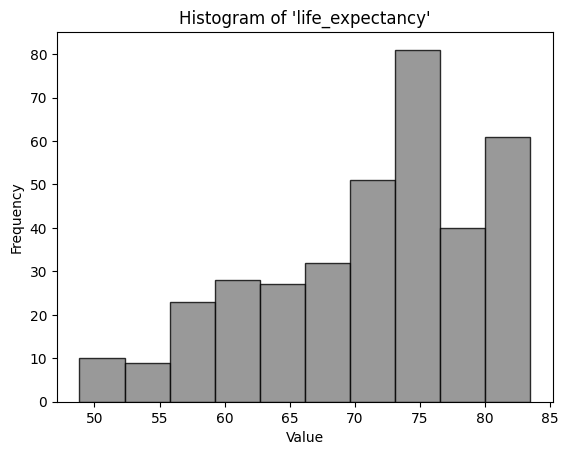

In [28]:
plot_histogram(data_copy_2['life_expectancy'])

In [29]:
#Loading Test data
test_data=pd.read_csv('test.csv',index_col=0)
test_data.head()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate
9,322460.0,2.088892e+07,1.054769e+07,NaN,0.846584,51.919416,low,2.569961,NaN,NaN,less than 1 per person,84 per 1000 people,1849926.0,very low access,[0%-25%)
16,513120.0,2.220651e+07,1.641032e+07,453550.0,42.139810,5.803190,low,2.184886,NaN,NaN,more than 1 per person,289 per 1000 people,17983312.0,very high access,[0%-25%)
19,18580.0,1.872230e+05,8.527691e+05,NaN,1.699056,67.396944,unknown,NaN,NaN,NaN,less than 1 per person,66 per 100 people,240458015.0,very high access,unknown
23,112490.0,3.252347e+06,4.857911e+06,20000.0,48.602426,4.934574,low,NaN,0.430158,NaN,less than 1 per person,178 per 1000 people,9427882.0,high access,[0%-25%)
28,783560.0,3.911844e+07,1.171853e+07,612800.0,43.734006,28.635994,medium low,NaN,0.624424,NaN,less than 1 per person,46 per 100 people,50379814.0,very high access,[0%-25%)


In [30]:
# Create a copy of test dataframe
tdf = test_data.copy()

# Step 1: Multiply 'surface_area' by 100
tdf['surface_area'] = tdf['surface_area'] * 100

# Step 2: Creates new variables 
tdf['agricultural_portion'] = tdf['agricultural_land'] / tdf['surface_area'] 
tdf['forest_portion'] = tdf['forest_area'] / tdf['surface_area']

# Step 3: Remove 'agricultural_land' and 'forest_area' colums from dataset
tdf.drop(['agricultural_land', 'forest_area'], axis=1, inplace=True)

# Step 4: Replace missing values in column 'inflation_annual' with information from
# columns 'inflation_monthly' & 'inflation_weekly'

for i in tdf.index:
    if np.isnan(tdf.loc[i, 'inflation_annual']):
        if np.isnan(tdf.loc[i, 'inflation_monthly']):
            tdf.loc[i, 'inflation_annual'] = 52 * tdf.loc[i, 'inflation_weekly']
        else:
            tdf.loc[i, 'inflation_annual'] = 12 * tdf.loc[i, 'inflation_monthly']

# Step5: Remove columns 'inflation_monthly' & 'inflation_weekly'
tdf.drop(['inflation_monthly', 'inflation_weekly'], axis=1, inplace=True)

# Step6: Convert 'internet_users' column to associated percentages
variable_split = tdf['internet_users'].str.split()
tdf['percent_internet_users'] = (pd.to_numeric(variable_split.str.get(0), errors='coerce') / 
                          pd.to_numeric(variable_split.str.get(2), errors='coerce'))

# Step 7: Remove 'internet_users' column
tdf.drop('internet_users', axis=1, inplace=True)

# Step 8: Assign "mobile_subscriptions" values to 1 if mobile subscriptions is
# less than 1 per person, otherwise 2:
tdf['mobile_subscriptions'] = [1 if x == 'less than 1 per person' else 2 for x in tdf['mobile_subscriptions']]

# Step 9: Assign "women_parliament_seats_rate" to 1 if women _parliament seat _rate is
# [0%-25%), 2 if it is [25%-75%), or 3 if unknown:

tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('[0%-25%)', 1))
tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('[25%-50%)', 2))
tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('[50%-75%)', 2))
tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('unknown', 3))

# Step 10: Assign numeric values to the levels of "national_income" (ordinal variable):
mapper_1 = {'very low': 1, 'medium low': 2, 'low': 3,
            'medium high': 4, 'high': 5, 'very high': 6,
            'unknown': 7}
tdf['national_income'] = tdf['national_income'].replace(mapper_1)

# Step 11: Assign numeric values to the levels of "improved_sanitation" (Ordinal Variable):
mapper_2 = {'very low access': 1, 'low access': 2, 'medium access': 3,
            'high access': 4, 'very high access': 5, 'no info': 6}

tdf['improved_sanitation'] = tdf['improved_sanitation'].replace(mapper_2)

# Step12: Impute missing values using Imputer in sklearn.preprocessing
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(tdf)
tdf = pd.DataFrame(data=imp.transform(tdf) , columns=tdf.columns)

# Show the first 5 rows of tdf
tdf.head()

/tmp/ipykernel_21731/1536648413.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tdf['women_parliament_seats_rate'].replace('unknown', 3))
/tmp/ipykernel_21731/1536648413.py:55: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tdf['national_income'] = tdf['national_income'].replace(mapper_1)
/tmp/ipykernel_21731/1536648413.py:61: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the fu

,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,mobile_subscriptions,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,agricultural_portion,forest_portion,percent_internet_users
0,32246000.0,50800.0,0.846584,51.919416,3.0,2.569961,1.0,1849926.0,1.0,1.0,0.647799,0.327101,0.084
1,51312000.0,453550.0,42.139810,5.803190,3.0,2.184886,2.0,17983312.0,5.0,1.0,0.432774,0.319814,0.289
2,1858000.0,50800.0,1.699056,67.396944,7.0,3.009844,1.0,240458015.0,5.0,3.0,0.100766,0.458972,0.660
3,11249000.0,20000.0,48.602426,4.934574,3.0,5.161899,1.0,9427882.0,4.0,1.0,0.289123,0.431853,0.178
4,78356000.0,612800.0,43.734006,28.635994,2.0,7.493090,1.0,50379814.0,5.0,1.0,0.499240,0.149555,0.460


In [31]:
# Create outcome and input DataFrames
y = data_copy_2['life_expectancy'] 
X = data_copy_2.drop('life_expectancy', axis=1)
y.head()

0    69.494195
1    59.237366
2    81.300000
3    81.373197
4    73.193561
Name: life_expectancy, dtype: float64

In [32]:
# Create train and validation datasets to build the Random Forest (RF) regression 
# model and find the best set of the model parameters 

#X_train, X_validation, y_train, y_validation= train_test_split(X, y,
# 

In [33]:
# Use 'Grid Search' to find the best set of RF regression parameters 
# using full dataset with criterion = 'mean absolute error' (mae) and 
# random_state = 33

n_estimators = [50, 100, 150, 200]
max_features = [4, 8, 13]
max_depth = [5, 6, 7]
min_split = [2, 3, 4] 
min_leaf = [1, 2, 3]
best_score = 100

for n in n_estimators:
    for f in max_features:
        for d in max_depth:
            for s in min_split:   
                for l in min_leaf:
                     rf = RandomForestRegressor(
                     n_estimators = n, 
                     criterion = 'absolute_error', 
                     max_features= f,
                     random_state = 33, 
                     oob_score = False,
                     max_depth = d, min_samples_split = s, 
                     min_samples_leaf = l)
            rf.fit(X, y)    
            y_model = rf.predict(X)
            #score = mean_absolute_error(y, y_model)
            score = - np.mean(cross_val_score(rf, X, y, cv=4, scoring = 'neg_mean_absolute_error'))
            if score <= best_score:
                best_score = score
                max_n = n
                max_f = f
                max_d = d
                max_s = s
                max_l = l


print ("Number of Estimators:", max_n)               
print ("Max features:", max_f)
print ("Max Depth:", max_d)
print ("Min Split:", max_s)
print ("Min Leaf:", max_l)
print("Best Mean Absolute Error: {:.3f}".format(best_score))

Number of Estimators: 200
Max features: 8
Max Depth: 7
Min Split: 4
Min Leaf: 3
Best Mean Absolute Error: 2.652


In [34]:
# Fit a RF using best indentified parameters
rf = RandomForestRegressor(n_estimators=200, criterion = 'absolute_error', max_features=8, random_state = 33,
                           max_depth=7, min_samples_split=4, min_samples_leaf=3)

rf.fit(X, y)

RandomForestRegressor(criterion='absolute_error', max_depth=7, max_features=8,
                      min_samples_leaf=3, min_samples_split=4, n_estimators=200,
                      random_state=33)

In [35]:
# Pridict test instances using test dataframe (tdf)
y_test = rf.predict(tdf)
y_test

array([61.21576236, 72.16588384, 77.61107216, 69.40190288, 74.16414459,
       67.68771207, 74.42011646, 67.52910183, 72.20630329, 72.54350411,
       76.28874821, 79.70545426, 60.13617755, 59.40224549, 81.43421862,
       75.18783973, 74.80842836, 75.07512402, 76.5904537 , 63.39665437,
       62.73040988, 73.3632119 , 74.23342103, 77.42346908, 74.01997477,
       70.23964583, 57.98779531, 81.31250431, 81.04001027, 79.11005128,
       74.58665473, 61.93740672, 59.78046512, 61.10390984, 81.15515007,
       80.02541122, 76.81927631, 80.07973041, 76.02097477, 80.614516  ,
       74.19985285, 67.1183765 , 63.9518991 , 62.14013361, 58.14060413,
       77.0478608 , 67.98762361, 64.84355717, 57.92309087, 76.76561652,
       74.84089812, 74.4934649 , 64.70950351, 80.93084923, 57.82439056,
       78.09968815, 80.79769058, 60.64691307, 73.52432017, 66.06888124,
       70.66573463, 74.1147379 , 55.5463757 , 71.56218833, 71.74548193,
       59.92385354, 61.98735486, 59.22230936, 75.31825953, 64.98

In [36]:
# Plot histograms to compare distribution of actual outcomes vs. prediction 
def plot_histogram_comp(x,y):
    plt.hist(x, alpha=0.5, edgecolor='black', label='Actual')
    plt.hist(y, alpha=0.5, edgecolor='black', label='Prediction')
    plt.title("Histogram of actual outcomes v.s predicted outcomes")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper left')
    plt.show()

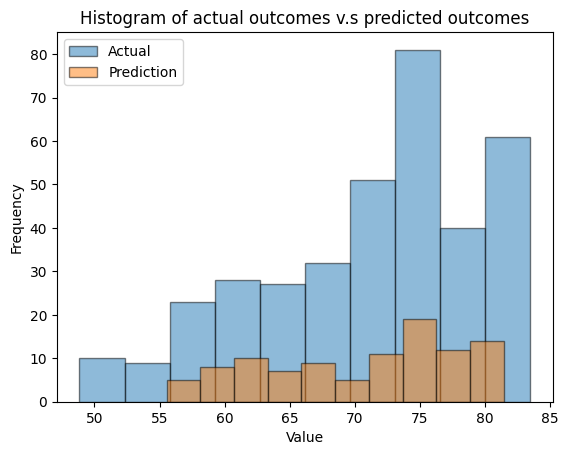

In [37]:
plot_histogram_comp(y,y_test)

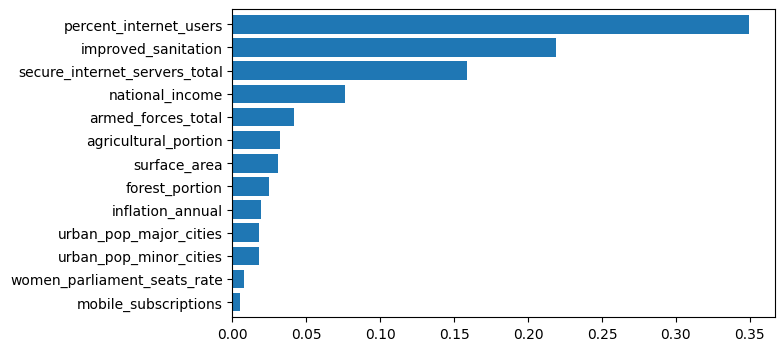

In [38]:
# Extract feature importance determined by RF model
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)
feature_imp.sort_values(ascending=True, inplace=True)

# Creating a bar plot
feature_imp.plot(kind='barh', width=0.8, figsize=(7,4));

In [39]:
# Create a submission_df
d = {'id': test_data.index, 'life_expectancy': y_test}
submission_df = pd.DataFrame(data=d)
submission_df

,id,life_expectancy
0,9,61.215762
1,16,72.165884
2,19,77.611072
3,23,69.401903
4,28,74.164145
...,...,...
95,433,55.739491
96,441,76.743974
97,443,69.580627
98,453,67.161542


In [40]:
#Submission
submission_df.to_csv('submissions.csv',index=False)